In [1]:
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
pd.set_option('MAX_ROWS', None) # Setting pandas to display a N number of columns
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn import tree # Modelling a tree
from sklearn.impute import SimpleImputer # Perform Imputation
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict # Cross Validation
from sklearn.linear_model import LogisticRegression # Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model
from sklearn.model_selection import train_test_split
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df_2019 = pd.read_csv('Jan_2019_ontime.csv')
df_2020 = pd.read_csv('Jan_2020_ontime.csv')
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
df_2019['year'] = 2019
df_2020['year'] = 2020

print(set(df_2020.columns) == set(df_2019.columns))
dataset = pd.concat([df_2019,df_2020])
print(dataset.shape)
print('\n')
dataset.head()

True
(1191331, 23)




,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [5]:
data = dataset.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21'], axis=1)
data = data.set_index('OP_CARRIER_FL_NUM')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [6]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [7]:
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().sum()/data.count(),
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.000000,int64
DAY_OF_WEEK,7,0.000000,int64
ORIGIN,353,0.000000,object
DEST,353,0.000000,object
DEP_TIME,1440,0.019700,float64
DEP_DEL15,2,0.019733,float64
DEP_TIME_BLK,19,0.000000,object
ARR_TIME,1440,0.020679,float64
ARR_DEL15,2,0.022399,float64
CANCELLED,2,0.000000,float64


In [8]:
data.dropna(inplace=True)

colunas = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
for col in colunas:
  data[col] = data[col].astype('category') 

data['DISTANCE_cat'] = pd.qcut(data['DISTANCE'], q=4)

In [9]:
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().mean()*100,
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.0,category
DAY_OF_WEEK,7,0.0,category
ORIGIN,353,0.0,object
DEST,353,0.0,object
DEP_TIME,1440,0.0,float64
DEP_DEL15,2,0.0,category
DEP_TIME_BLK,19,0.0,object
ARR_TIME,1440,0.0,float64
ARR_DEL15,2,0.0,category
CANCELLED,1,0.0,category


In [10]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]"
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]"
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]"
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]"
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]"


Text(0, 0.5, 'Freq')

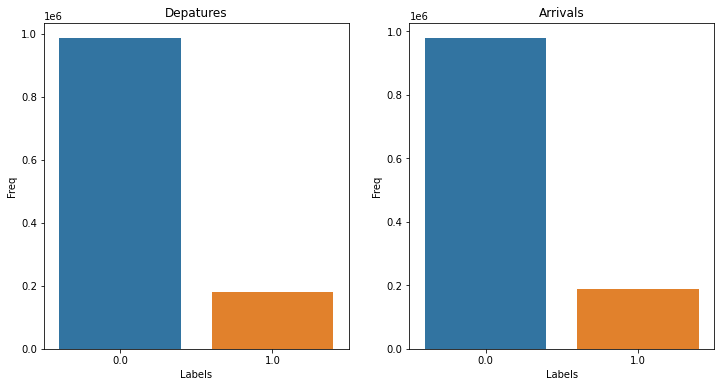

In [11]:
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(data['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(data['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

Text(0, 0.5, 'Freq')

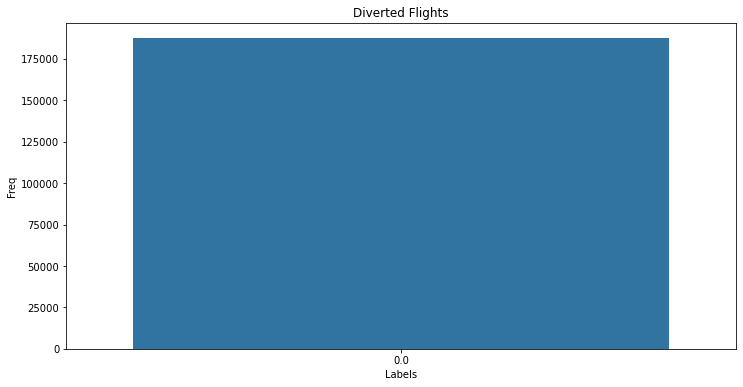

In [12]:
voos_atrasados = data.loc[data['ARR_DEL15'] == 1,['DIVERTED']]


f, ax= plt.subplots(figsize=(12,6))


desv = sns.countplot(voos_atrasados['DIVERTED'], ax=ax)
desv.set_title('Diverted Flights')
desv.set_xlabel('Labels')
desv.set_ylabel('Freq')

In [13]:
week = data[['DAY_OF_WEEK','ARR_DEL15']].groupby('DAY_OF_WEEK').sum().sort_values(by='ARR_DEL15',ascending=False)
week['PERCENTUAL'] = week['ARR_DEL15']/(week['ARR_DEL15'].sum())*100
month = data[['DAY_OF_MONTH','ARR_DEL15']].groupby('DAY_OF_MONTH').sum().sort_values(by='ARR_DEL15',ascending=False)
month['PERCENTUAL'] = month['ARR_DEL15']/(month['ARR_DEL15'].sum())*100

print('Delayed flights by weekday<<')
print(week)
print('\n')
print('Delayed flights by monthday <<')
print(month)

Delayed flights by weekday<<
             ARR_DEL15  PERCENTUAL
DAY_OF_WEEK                       
1                  NaN         NaN
2                  NaN         NaN
3                  NaN         NaN
4                  NaN         NaN
5                  NaN         NaN
6                  NaN         NaN
7                  NaN         NaN


Delayed flights by monthday <<
              ARR_DEL15  PERCENTUAL
DAY_OF_MONTH                       
1                   NaN         NaN
2                   NaN         NaN
3                   NaN         NaN
4                   NaN         NaN
5                   NaN         NaN
6                   NaN         NaN
7                   NaN         NaN
8                   NaN         NaN
9                   NaN         NaN
10                  NaN         NaN
11                  NaN         NaN
12                  NaN         NaN
13                  NaN         NaN
14                  NaN         NaN
15                  NaN         NaN
16         

In [14]:
time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk['PERCENTUAL'] = time_blk['ARR_DEL15']/(time_blk['ARR_DEL15'].sum())*100
time_blk

,ARR_DEL15,PERCENTUAL
DEP_TIME_BLK,,
0001-0559,NaN,NaN
0600-0659,NaN,NaN
0700-0759,NaN,NaN
0800-0859,NaN,NaN
0900-0959,NaN,NaN
1000-1059,NaN,NaN
1100-1159,NaN,NaN
1200-1259,NaN,NaN
1300-1359,NaN,NaN


In [15]:
origin_later = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
origin_later['PERCENTUAL'] = origin_later['DEP_DEL15']/(origin_later['DEP_DEL15'].sum())*100
origin_later.head()

,DEP_DEL15,PERCENTUAL
ORIGIN,,
ABE,NaN,NaN
ABI,NaN,NaN
ABQ,NaN,NaN
ABR,NaN,NaN
ABY,NaN,NaN


In [16]:
dest_later = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_later['PERCENTUAL'] = dest_later['ARR_DEL15']/(dest_later['ARR_DEL15'].sum())*100
dest_later.head()

,ARR_DEL15,PERCENTUAL
DEST,,
ABE,NaN,NaN
ABI,NaN,NaN
ABQ,NaN,NaN
ABR,NaN,NaN
ABY,NaN,NaN


In [17]:
def arr_time(x):
    if x >= 600 and x <= 659:
        return '0600-0659'
    elif x>=1400 and x<=1459:
        return '1400-1459'
    elif x>=1200 and x<=1259:
        return '1200-1259'
    elif x>=1500 and x<=1559:
        return '1500-1559'
    elif x>=1900 and x<=1959:
        return '1900-1959'
    elif x>=900 and x<=959:
        return '0900-0959'
    elif x>=1000 and x<=1059:
        return  '1000-1059'
    elif x>=2000 and x<=2059:
        return '2000-2059'
    elif x>=1300 and x<=1359:
        return '1300-1359'
    elif x>=1100 and x<=1159:
            return '1100-1159'
    elif x>=800 and x<=859:
        return '0800-0859'
    elif x>=2200 and x<=2259:
        return '2200-2259'
    elif x>=1600 and x<=1659:
        return '1600-1659'
    elif x>=1700 and x<=1759:
        return '1700-1759'
    elif x>=2100 and x<=2159:
        return '2100-2159'
    elif x>=700 and x<=759:
        return '0700-0759'
    elif x>=1800 and x<=1859:
        return '1800-1859'
    elif x>=1 and x<=559:
        return '0001-0559'
    elif x>=2300 and x<=2400:
        return '2300-2400'

In [18]:
data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959


In [19]:
count_time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
count_time_blk.reset_index(inplace=True)
count_time_blk.head()
data1 = data.merge(count_time_blk, left_on='DEP_TIME_BLK', right_on='DEP_TIME_BLK') 
data1.rename({'ARR_DEL15_y':'quant_dep_time_blk','ARR_DEL15_x':'ARR_DEL15' }, inplace=True, axis=1)
data1.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN
1,3290,1,2,CAK,ATL,557.0,0.0,0600-0659,737,0.0,0.0,0.0,528.0,2019,"(368.0, 641.0]",0700-0759,NaN
2,3330,1,2,GTR,ATL,636.0,0.0,0600-0659,850,0.0,0.0,0.0,241.0,2019,"(30.999, 368.0]",0800-0859,NaN
3,3335,1,2,LFT,ATL,553.0,0.0,0600-0659,827,0.0,0.0,0.0,503.0,2019,"(368.0, 641.0]",0800-0859,NaN
4,3349,1,2,AGS,ATL,601.0,0.0,0600-0659,704,0.0,0.0,0.0,143.0,2019,"(30.999, 368.0]",0700-0759,NaN


In [20]:
count_later_origin = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
count_later_origin.reset_index(inplace=True)
count_later_origin.head()
data2 = data1.merge(count_later_origin, left_on='ORIGIN', right_on='ORIGIN')
data2.rename({'DEP_DEL15_y':'count_later_origin','DEP_DEL15_x':'DEP_DEL15' }, inplace=True, axis=1)
data2.head() 

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN
1,3831,1,2,GNV,MIA,621.0,0.0,0600-0659,734,0.0,0.0,0.0,294.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN
2,3426,2,3,GNV,ATL,546.0,0.0,0600-0659,655,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0600-0659,NaN,NaN
3,3426,3,4,GNV,ATL,555.0,0.0,0600-0659,718,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN
4,3831,3,4,GNV,MIA,619.0,0.0,0600-0659,723,0.0,0.0,0.0,294.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN


In [21]:
count_later_dest = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
count_later_dest.reset_index(inplace=True)
count_later_dest.head()
data3 = data2.merge(count_later_dest, left_on='DEST', right_on='DEST')
data3.rename({'ARR_DEL15_y':'count_later_dest','ARR_DEL15_x':'ARR_DEL15' },inplace=True, axis=1)
data3.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin,count_later_dest
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN,NaN
1,3426,2,3,GNV,ATL,546.0,0.0,0600-0659,655,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0600-0659,NaN,NaN,NaN
2,3426,3,4,GNV,ATL,555.0,0.0,0600-0659,718,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN,NaN
3,3426,4,5,GNV,ATL,544.0,0.0,0600-0659,703,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN,NaN
4,381,5,6,GNV,ATL,605.0,0.0,0600-0659,730,1.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,NaN,NaN,NaN


In [22]:
base_final = data3.copy()
base_final.drop(['DEP_TIME','ARR_TIME','OP_CARRIER_FL_NUM'], inplace=True, axis=1)
base_final.set_index('year',inplace=True)

In [23]:
target_final = base_final[['ARR_DEL15']]

cat_vars_final = base_final.select_dtypes(['object','category'])
cat_vars_final = cat_vars_final.loc[:, ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_DEL15','DEP_TIME_BLK','CANCELLED',
                            'DIVERTED','DISTANCE_cat','ARR_TIME_BLOCK']]

#One Hot Encoder

enc = OneHotEncoder().fit(cat_vars_final)

cat_vars_ohe_final = enc.transform(cat_vars_final).toarray()
cat_vars_ohe_final = pd.DataFrame(cat_vars_ohe_final, index= cat_vars_final.index, 
                      columns=enc.get_feature_names(cat_vars_final.columns.tolist()))

In [27]:
target_2019_final = target_final[target_final.index == 2019]
target_2020_final = target_final[target_final.index == 2020]

cat_vars_ohe_2019_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2019]
cat_vars_ohe_2020_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2020]



lr_model_final = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(cat_vars_ohe_2019_final, target_2019_final, test_size=0.30, random_state=42)

lr_model_final.fit(X_train, y_train)

LogisticRegression()

In [26]:
lr_model_final.score(X_test,y_test)

0.9144055268598084